<a href="https://colab.research.google.com/github/Pradnya19-98/projects/blob/main/large_ecommerce_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os


In [3]:
from google.colab import files
uploaded = files.upload()


Saving large_ecommerce_sales.csv to large_ecommerce_sales.csv


In [28]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['large_ecommerce_sales.csv'])) # Use the correct key 'ecommerce_sales.csv'
print(df)

     Order_ID Product     Category    Price  Quantity  Revenue  Order_Date  \
0        1001  Jacket  Accessories   1000.0       2.0  30000.0  2025-01-01   
1        1002   Watch  Accessories   2000.0       2.0  30000.0  2025-01-02   
2        1003     Bag      Fashion      NaN       3.0  10000.0  2025-01-03   
3        1004      TV      Fashion      NaN       2.0  20000.0  2025-01-04   
4        1005  Jacket  Electronics  50000.0       2.0  30000.0  2025-01-05   
..        ...     ...          ...      ...       ...      ...         ...   
120      1029  Jacket  Electronics  50000.0       3.0      NaN  2025-01-29   
121      1065   Phone      Fashion   5000.0       2.0   5000.0  2025-03-06   
122      1055     Bag  Accessories   1000.0       4.0  30000.0  2025-02-24   
123      1031  Tablet      Fashion  10000.0       2.0  10000.0  2025-01-31   
124      1054   Phone  Electronics  10000.0       3.0  20000.0  2025-02-23   

    Customer_City  Discount  
0         Kolkata    2000.0  
1  

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       125 non-null    int64  
 1   Product        125 non-null    object 
 2   Category       125 non-null    object 
 3   Price          115 non-null    float64
 4   Quantity       99 non-null     float64
 5   Revenue        97 non-null     float64
 6   Order_Date     125 non-null    object 
 7   Customer_City  125 non-null    object 
 8   Discount       96 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 8.9+ KB


In [6]:
df.head(10)

,Order_ID,Product,Category,Price,Quantity,Revenue,Order_Date,Customer_City,Discount
0,1001,Jacket,Accessories,1000.0,2.0,30000.0,2025-01-01,Kolkata,2000.0
1,1002,Watch,Accessories,2000.0,2.0,30000.0,2025-01-02,Kolkata,500.0
2,1003,Bag,Fashion,NaN,3.0,10000.0,2025-01-03,Hyderabad,500.0
3,1004,TV,Fashion,NaN,2.0,20000.0,2025-01-04,Bangalore,500.0
4,1005,Jacket,Electronics,50000.0,2.0,30000.0,2025-01-05,Ahmedabad,NaN
5,1006,Sunglasses,Accessories,2000.0,3.0,5000.0,2025-01-06,Ahmedabad,5000.0
6,1007,Shoes,Accessories,5000.0,2.0,5000.0,2025-01-07,Kolkata,NaN
7,1008,Jacket,Accessories,NaN,2.0,NaN,2025-01-08,Delhi,5000.0
8,1009,Bag,Electronics,10000.0,2.0,20000.0,2025-01-09,Hyderabad,NaN
9,1010,TV,Electronics,2000.0,1.0,20000.0,2025-01-10,Chennai,NaN


In [7]:
df.isnull().sum()

,0
Order_ID,0
Product,0
Category,0
Price,10
Quantity,26
Revenue,28
Order_Date,0
Customer_City,0
Discount,29


In [8]:
df.describe()

,Order_ID,Price,Quantity,Revenue,Discount
count,125.000000,115.000000,99.000000,97.000000,96.000000
mean,1059.952000,15547.826087,2.484848,15773.195876,1734.375000
std,34.302698,17865.601309,1.091373,9637.713632,1523.419155
min,1001.000000,1000.000000,1.000000,5000.000000,500.000000
25%,1031.000000,2000.000000,2.000000,5000.000000,500.000000
50%,1059.000000,10000.000000,2.000000,10000.000000,1000.000000
75%,1089.000000,20000.000000,4.000000,20000.000000,2000.000000
max,1120.000000,50000.000000,4.000000,30000.000000,5000.000000


In [9]:
df.fillna(method='ffill', inplace=True)

<ipython-input-9-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [14]:
df.duplicated().sum()

4

In [15]:
  df.drop_duplicates(inplace=True)

In [30]:
date_columns = ['Order_Date']
df[date_columns] = df[date_columns].apply(pd.to_datetime)

In [31]:
df

,Order_ID,Product,Category,Price,Quantity,Revenue,Order_Date,Customer_City,Discount
0,1001,Jacket,Accessories,1000.0,2.0,30000.0,2025-01-01,Kolkata,2000.0
1,1002,Watch,Accessories,2000.0,2.0,30000.0,2025-01-02,Kolkata,500.0
2,1003,Bag,Fashion,NaN,3.0,10000.0,2025-01-03,Hyderabad,500.0
3,1004,TV,Fashion,NaN,2.0,20000.0,2025-01-04,Bangalore,500.0
4,1005,Jacket,Electronics,50000.0,2.0,30000.0,2025-01-05,Ahmedabad,NaN
...,...,...,...,...,...,...,...,...,...
120,1029,Jacket,Electronics,50000.0,3.0,NaN,2025-01-29,Bangalore,1000.0
121,1065,Phone,Fashion,5000.0,2.0,5000.0,2025-03-06,Kolkata,1000.0
122,1055,Bag,Accessories,1000.0,4.0,30000.0,2025-02-24,Delhi,500.0
123,1031,Tablet,Fashion,10000.0,2.0,10000.0,2025-01-31,Hyderabad,2000.0


In [32]:
df

,Order_ID,Product,Category,Price,Quantity,Revenue,Order_Date,Customer_City,Discount
0,1001,Jacket,Accessories,1000.0,2.0,30000.0,2025-01-01,Kolkata,2000.0
1,1002,Watch,Accessories,2000.0,2.0,30000.0,2025-01-02,Kolkata,500.0
2,1003,Bag,Fashion,NaN,3.0,10000.0,2025-01-03,Hyderabad,500.0
3,1004,TV,Fashion,NaN,2.0,20000.0,2025-01-04,Bangalore,500.0
4,1005,Jacket,Electronics,50000.0,2.0,30000.0,2025-01-05,Ahmedabad,NaN
...,...,...,...,...,...,...,...,...,...
120,1029,Jacket,Electronics,50000.0,3.0,NaN,2025-01-29,Bangalore,1000.0
121,1065,Phone,Fashion,5000.0,2.0,5000.0,2025-03-06,Kolkata,1000.0
122,1055,Bag,Accessories,1000.0,4.0,30000.0,2025-02-24,Delhi,500.0
123,1031,Tablet,Fashion,10000.0,2.0,10000.0,2025-01-31,Hyderabad,2000.0


,_o_r_d_e_r___i_d_,_p_r_o_d_u_c_t_,_c_a_t_e_g_o_r_y_,_p_r_i_c_e_,_q_u_a_n_t_i_t_y_,_r_e_v_e_n_u_e_,_o_r_d_e_r___d_a_t_e_,_c_u_s_t_o_m_e_r___c_i_t_y_,_d_i_s_c_o_u_n_t_
0,1001,Jacket,Accessories,1000.0,2.0,30000.0,2025-01-01,Kolkata,2000.0
1,1002,Watch,Accessories,2000.0,2.0,30000.0,2025-01-02,Kolkata,500.0
2,1003,Bag,Fashion,2000.0,3.0,10000.0,2025-01-03,Hyderabad,500.0
3,1004,TV,Fashion,2000.0,2.0,20000.0,2025-01-04,Bangalore,500.0
4,1005,Jacket,Electronics,50000.0,2.0,30000.0,2025-01-05,Ahmedabad,500.0
...,...,...,...,...,...,...,...,...,...
116,1117,Sunglasses,Fashion,1000.0,2.0,20000.0,2025-04-27,Kolkata,2000.0
117,1118,Jacket,Electronics,5000.0,1.0,10000.0,2025-04-28,Delhi,5000.0
118,1119,Jacket,Accessories,2000.0,4.0,10000.0,2025-04-29,Chennai,5000.0
119,1120,Tablet,Electronics,1000.0,3.0,10000.0,2025-04-30,Ahmedabad,500.0


In [35]:
print("\nTop 5 Selling Products:")
if 'Product' in df.columns and'Quantity' in df.columns:
  print(df.groupby('Product')['Quantity'].sum().sort_values(ascending =False).head() )


Top 5 Selling Products:
Product
Bag           35.0
Jacket        32.0
Phone         30.0
Sunglasses    27.0
Shoes         26.0
Name: Quantity, dtype: float64


In [39]:
df

,Order_ID,Product,Category,Price,Quantity,Revenue,Order_Date,Customer_City,Discount
0,1001,Jacket,Accessories,1000.0,2.0,30000.0,2025-01-01,Kolkata,2000.0
1,1002,Watch,Accessories,2000.0,2.0,30000.0,2025-01-02,Kolkata,500.0
2,1003,Bag,Fashion,NaN,3.0,10000.0,2025-01-03,Hyderabad,500.0
3,1004,TV,Fashion,NaN,2.0,20000.0,2025-01-04,Bangalore,500.0
4,1005,Jacket,Electronics,50000.0,2.0,30000.0,2025-01-05,Ahmedabad,NaN
...,...,...,...,...,...,...,...,...,...
120,1029,Jacket,Electronics,50000.0,3.0,NaN,2025-01-29,Bangalore,1000.0
121,1065,Phone,Fashion,5000.0,2.0,5000.0,2025-03-06,Kolkata,1000.0
122,1055,Bag,Accessories,1000.0,4.0,30000.0,2025-02-24,Delhi,500.0
123,1031,Tablet,Fashion,10000.0,2.0,10000.0,2025-01-31,Hyderabad,2000.0


In [41]:
  df['total_sales'] = df['Price'] * df['Quantity']

In [51]:
df.groupby('Product')['total_sales'].sum().sort_values(ascending=False).head()


,total_sales
Product,
Jacket,715000.0
Tablet,508000.0
Phone,421000.0
Sunglasses,299000.0
TV,297000.0


In [62]:
print("\nTotal Revenue & Quantity per Category:")
category_sales=df.groupby("Category")


Total Revenue & Quantity per Category:



Monthly Sales Trend:
order_month
2025-01    815000.0
2025-02    814000.0
2025-03    727000.0
2025-04    695000.0
Freq: M, Name: total_sales, dtype: float64


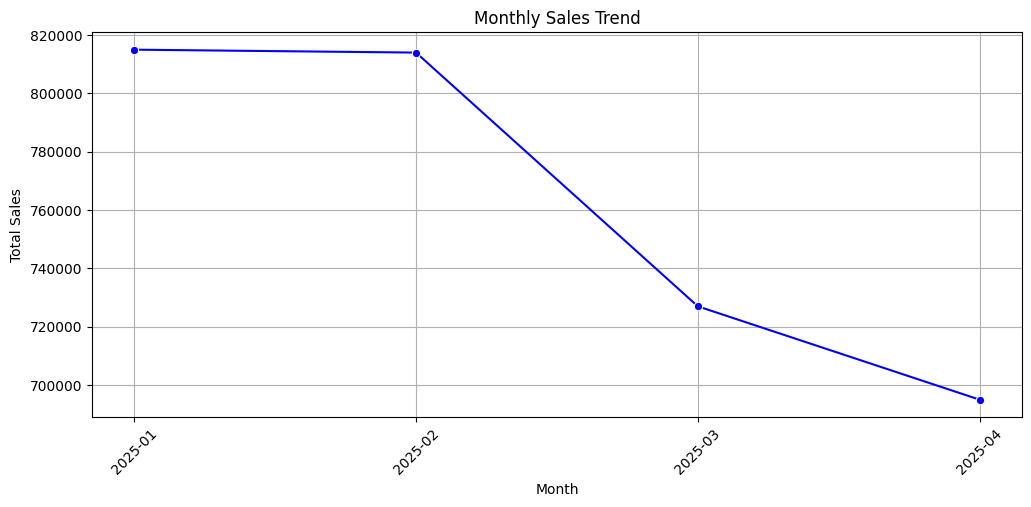

In [64]:
df['order_month'] = df['Order_Date'].dt.to_period('M')
print("\nMonthly Sales Trend:")
monthly_sales_trend = df.groupby('order_month')['total_sales'].sum() # Store the result
print(monthly_sales_trend)
plt.figure(figsize=(12, 5)) # Remove extra spaces before plt.figure
sns.lineplot(x=monthly_sales_trend.index.astype(str), y=monthly_sales_trend.values, marker='o', color='b')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [49]:
  # Print Total Sales
print("\nTotal Sales:")
if 'total_sales' in df.columns:
    print(df['total_sales'].sum())


Total Sales:
3051000.0


In [59]:
# Top 5 Best-Selling Products by Quantity
if 'Product' in df.columns and 'Quantity' in df.columns: # Changed 'Products' to 'Product'
    top_products_by_quantity = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head()
    print("\nTop 5 Best-Selling Products by Quantity:")
    print(top_products_by_quantity)


Top 5 Best-Selling Products by Quantity:
Product
Bag           35.0
Jacket        32.0
Phone         30.0
Sunglasses    27.0
Shoes         26.0
Name: Quantity, dtype: float64


<ipython-input-60-79ffd0306a65>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_by_quantity.index, y=top_products_by_quantity.values, palette='viridis')


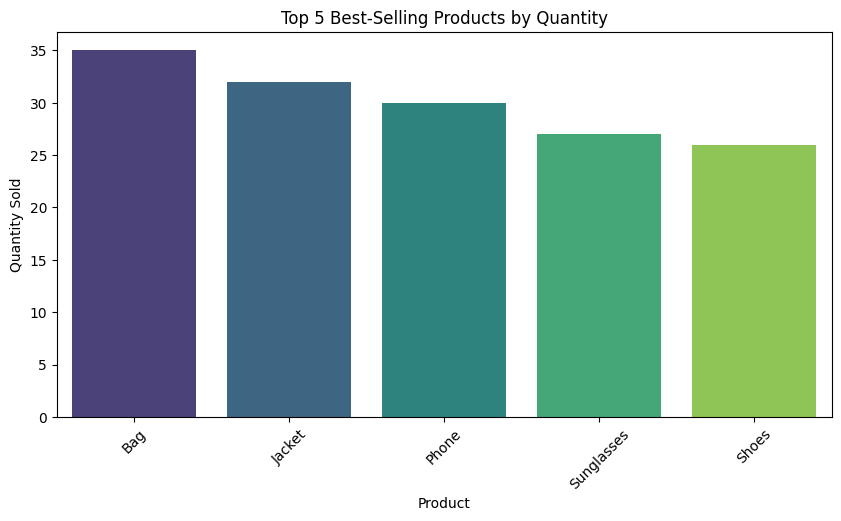

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products_by_quantity.index, y=top_products_by_quantity.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 5 Best-Selling Products by Quantity")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.show()

In [71]:
if 'Order_ID' in df.columns and 'Order_Date' in df.columns:
    print("\nCustomer Segmentation (RFM Analysis):")
    latest_date = df['Order_Date'].max()
    rfm = df.groupby('Order_ID').agg({
        'Order_Date': lambda x: (latest_date - x.max()).days,  # Recency
        'Order_ID': 'count',  # Frequency
        'total_sales': 'sum'  # Monetary Value
    })
    rfm.columns = ['recency', 'frequency', 'monetary']
    print(rfm.head())


Customer Segmentation (RFM Analysis):
          recency  frequency  monetary
Order_ID                              
1001          119          1    2000.0
1002          118          1    4000.0
1003          117          1       0.0
1004          116          1       0.0
1005          115          1  100000.0


In [74]:
# Interactive Filtering (by Category & Date Range)
def filter_data(Category=None, start_date=None, end_date=None):
    filtered_df = df.copy()
    if Category and 'Category' in df.columns:
        filtered_df = filtered_df[filtered_df['Category'] == Category]
    if start_date and end_date and 'Order_Date' in df.columns:
        filtered_df = filtered_df[(filtered_df['Order_Date'] >= start_date) & (filtered_df['Order_Date'] <= end_date)]
    return filtered_df

In [76]:
filtered_results = filter_data(Category='Electronics', start_date='2024-01-01', end_date='2024-12-31')
print("\nFiltered Data Sample:")
print(filtered_results.head())


Filtered Data Sample:
Empty DataFrame
Columns: [Order_ID, Product, Category, Price, Quantity, Revenue, Order_Date, Customer_City, Discount, total_sales, order_month]
Index: []
